In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap
import sarchl
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
dcu_data = pd.read_csv('./DCU_803.csv',index_col=0)
dcu_data = pd.concat([dcu_data,pd.read_csv('./DCU_1010.csv',index_col=0)])
dcu_data.columns = ['Benchmark','CU','DCU','ISA']

In [21]:
dcu_data = dcu_data.melt(id_vars=['Benchmark','ISA'],value_vars=['CU','DCU'])
dcu_data.columns=['Benchmark','ISA','GPU','execution_time']

In [22]:
dcu_data['Configuration']=dcu_data['GPU']+ '+' + dcu_data['ISA'].astype(str)
dcu_data

Benchmark      ISA  GPU  execution_time Configuration
0       ATAX   GFX803   CU        0.095576     CU+GFX803
1       BICG   GFX803   CU        0.096399     CU+GFX803
2         BS   GFX803   CU        0.005765     CU+GFX803
3        FIR   GFX803   CU        0.000926     CU+GFX803
4        FLW   GFX803   CU        0.022858     CU+GFX803
5        FWT   GFX803   CU        0.000787     CU+GFX803
6         KM   GFX803   CU        0.014495     CU+GFX803
7         MT   GFX803   CU        0.000693     CU+GFX803
8         PR   GFX803   CU        0.003945     CU+GFX803
9       ReLU   GFX803   CU        0.000821     CU+GFX803
10      SPMV   GFX803   CU        0.000585     CU+GFX803
11      ATAX  GFX1010   CU        0.094497    CU+GFX1010
12      BICG  GFX1010   CU        0.094795    CU+GFX1010
13        BS  GFX1010   CU        0.005634    CU+GFX1010
14       FIR  GFX1010   CU        0.001258    CU+GFX1010
15       FLW  GFX1010   CU        0.019168    CU+GFX1010
16       FWT  GFX1010   CU        0.000781    CU+GFX1010
17        KM  GFX1010   CU        0.015118    CU+GFX1010
18        MT  GFX1010   CU        0.000621    CU+GFX1010
19        PR  GFX1010   CU        0.003944    CU+GFX1010
20      ReLU  GFX1010   CU        0.000821    CU+GFX1010
21      SPMV  GFX1010   CU        0.000655    CU+GFX1010
22      ATAX   GFX803  DCU        0.051188    DCU+GFX803
23      BICG   GFX803  DCU        0.052131    DCU+GFX803
24        BS   GFX803  DCU        0.005718    DCU+GFX803
25       FIR   GFX803  DCU        0.001525    DCU+GFX803
26       FLW   GFX803  DCU        0.019906    DCU+GFX803
27       FWT   GFX803  DCU        0.000803    DCU+GFX803
28        KM   GFX803  DCU        0.014792    DCU+GFX803
29        MT   GFX803  DCU        0.000709    DCU+GFX803
30        PR   GFX803  DCU        0.003944    DCU+GFX803
31      ReLU   GFX803  DCU        0.000821    DCU+GFX803
32      SPMV   GFX803  DCU        0.000577    DCU+GFX803
33      ATAX  GFX1010  DCU        0.031146   DCU+GFX1010
34      BICG  GFX1010  DCU        0.032933   DCU+GFX1010
35        BS  GFX1010  DCU        0.005650   DCU+GFX1010
36       FIR  GFX1010  DCU        0.000898   DCU+GFX1010
37       FLW  GFX1010  DCU        0.019588   DCU+GFX1010
38       FWT  GFX1010  DCU        0.000778   DCU+GFX1010
39        KM  GFX1010  DCU        0.014621   DCU+GFX1010
40        MT  GFX1010  DCU        0.000640   DCU+GFX1010
41        PR  GFX1010  DCU        0.003944   DCU+GFX1010
42      ReLU  GFX1010  DCU        0.000821   DCU+GFX1010
43      SPMV  GFX1010  DCU        0.000661   DCU+GFX1010

In [23]:
dcu_data=dcu_data.pivot(index='Benchmark',columns='Configuration',values='execution_time')
dcu_data

Configuration  CU+GFX1010  CU+GFX803  DCU+GFX1010  DCU+GFX803
Benchmark                                                    
ATAX             0.094497   0.095576     0.031146    0.051188
BICG             0.094795   0.096399     0.032933    0.052131
BS               0.005634   0.005765     0.005650    0.005718
FIR              0.001258   0.000926     0.000898    0.001525
FLW              0.019168   0.022858     0.019588    0.019906
FWT              0.000781   0.000787     0.000778    0.000803
KM               0.015118   0.014495     0.014621    0.014792
MT               0.000621   0.000693     0.000640    0.000709
PR               0.003944   0.003945     0.003944    0.003944
ReLU             0.000821   0.000821     0.000821    0.000821
SPMV             0.000655   0.000585     0.000661    0.000577

In [24]:
dcu_data['DCU+GFX1010'] = dcu_data['DCU+GFX1010']/dcu_data['CU+GFX803']
dcu_data['DCU+GFX803'] = dcu_data['DCU+GFX803']/dcu_data['CU+GFX803']
dcu_data['CU+GFX1010'] = dcu_data['CU+GFX1010']/dcu_data['CU+GFX803']
dcu_data['CU+GFX803'] = dcu_data['CU+GFX803']/dcu_data['CU+GFX803']
dcu_data.reset_index(inplace=True)
dcu_data

Configuration Benchmark  CU+GFX1010  CU+GFX803  DCU+GFX1010  DCU+GFX803
0                  ATAX    0.988713        1.0     0.325878    0.535573
1                  BICG    0.983365        1.0     0.341632    0.540783
2                    BS    0.977306        1.0     0.979978    0.991839
3                   FIR    1.358167        1.0     0.968946    1.646014
4                   FLW    0.838567        1.0     0.856948    0.870875
5                   FWT    0.993264        1.0     0.989221    1.020206
6                    KM    1.042973        1.0     1.008686    1.020454
7                    MT    0.896573        1.0     0.923174    1.023778
8                    PR    0.999733        1.0     0.999671    0.999677
9                  ReLU    0.999971        1.0     0.999984    0.999974
10                 SPMV    1.119263        1.0     1.130840    0.987184

In [25]:
dcu_data = dcu_data.melt(id_vars=['Benchmark'],value_vars=['CU+GFX803','CU+GFX1010','DCU+GFX803','DCU+GFX1010'])
dcu_data.columns=['Benchmark','Configuration','Normalized\nExecution Time']

In [26]:
dcu_data

Benchmark Configuration  Normalized\nExecution Time
0       ATAX     CU+GFX803                    1.000000
1       BICG     CU+GFX803                    1.000000
2         BS     CU+GFX803                    1.000000
3        FIR     CU+GFX803                    1.000000
4        FLW     CU+GFX803                    1.000000
5        FWT     CU+GFX803                    1.000000
6         KM     CU+GFX803                    1.000000
7         MT     CU+GFX803                    1.000000
8         PR     CU+GFX803                    1.000000
9       ReLU     CU+GFX803                    1.000000
10      SPMV     CU+GFX803                    1.000000
11      ATAX    CU+GFX1010                    0.988713
12      BICG    CU+GFX1010                    0.983365
13        BS    CU+GFX1010                    0.977306
14       FIR    CU+GFX1010                    1.358167
15       FLW    CU+GFX1010                    0.838567
16       FWT    CU+GFX1010                    0.993264
17        KM    CU+GFX1010                    1.042973
18        MT    CU+GFX1010                    0.896573
19        PR    CU+GFX1010                    0.999733
20      ReLU    CU+GFX1010                    0.999971
21      SPMV    CU+GFX1010                    1.119263
22      ATAX    DCU+GFX803                    0.535573
23      BICG    DCU+GFX803                    0.540783
24        BS    DCU+GFX803                    0.991839
25       FIR    DCU+GFX803                    1.646014
26       FLW    DCU+GFX803                    0.870875
27       FWT    DCU+GFX803                    1.020206
28        KM    DCU+GFX803                    1.020454
29        MT    DCU+GFX803                    1.023778
30        PR    DCU+GFX803                    0.999677
31      ReLU    DCU+GFX803                    0.999974
32      SPMV    DCU+GFX803                    0.987184
33      ATAX   DCU+GFX1010                    0.325878
34      BICG   DCU+GFX1010                    0.341632
35        BS   DCU+GFX1010                    0.979978
36       FIR   DCU+GFX1010                    0.968946
37       FLW   DCU+GFX1010                    0.856948
38       FWT   DCU+GFX1010                    0.989221
39        KM   DCU+GFX1010                    1.008686
40        MT   DCU+GFX1010                    0.923174
41        PR   DCU+GFX1010                    0.999671
42      ReLU   DCU+GFX1010                    0.999984
43      SPMV   DCU+GFX1010                    1.130840

In [27]:
palt = sarchl.sequential_palette(4)
palt

['#02090a', '#1b5f71', '#3bb1d1', '#a2dae9']

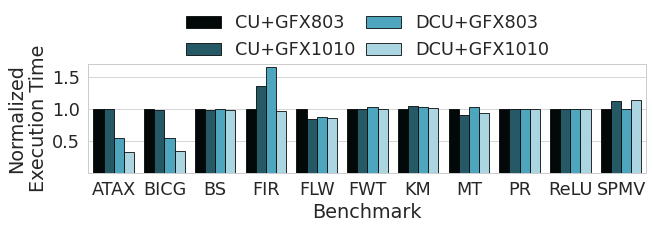

In [28]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=dcu_data, 
            x='Benchmark', hue='Configuration', y='Normalized\nExecution Time', 
            palette=palt, ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.25), loc=10, ncol=2)
ax.set_ylim(0, 1.7)
ax.set_yticks([0.5,1.0, 1.5])
plt.savefig('DCU.pdf', bbox_inches='tight')
plt.show()
